In the following the global games sales are analyzed, with special attention to sales
in the North America European and Japanese markets.

In the analysis, we will try to answer three questions:

1. what are some major differences between the North American, European, and Japanese video game markets?
2. what video game genres are trending in each market?
3. what features about a video game are most indicative of its success?

**Methodology**

The differences in the three markets will be assessed by visual inspection of the Platform,
Genre and Publisher trends, both in the years and cumulatively. Plotting the Genre trends in the years
will also answer the question relative to trending generes in each market.

Finally, the features important for conversion will be determined by modeling
the data with an XGBoost regressor and extracting its important features.


We start by importing the dataset and performing a preliminary EDA with pandas profiling.

In [119]:
import pandas as pd
vgsales_i = pd.read_csv('vgsales.txt')
print(vgsales_i.head())


   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  


In [5]:
from pandas_profiling import ProfileReport
profile = ProfileReport(vgsales_i, title='Pandas Profiling Report')
profile.to_file(output_file='vgsales.html')

From the profile, very few data points are missing in two columns: Year and Publisher.

For the time being, the rows that present empty values are discarded: these rows only constitute 2% of the
whole dataframe.

In [121]:
vgsales = vgsales_i.dropna()
print(round(len(vgsales)*100/len(vgsales_i), 3))


98.15


**What are some major differences between the North American, European, and Japanese video game markets?**

In order to assess differences in the three markets, three dataframes are created for each of the markets.

In [7]:
vgsales_NA = vgsales[vgsales['NA_Sales']!= 0]
vgsales_EU = vgsales[vgsales['EU_Sales']!= 0]
vgsales_JP = vgsales[vgsales['JP_Sales']!= 0]

print(len(vgsales_NA))
print(len(vgsales_EU))
print(len(vgsales_JP))

11861
10667
6084


<AxesSubplot:>

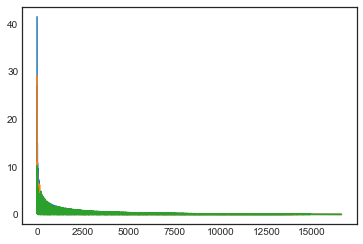

In [11]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn-white')

The following functions respectively transform the dataframe of interest, grouping it by the parameter (for example,
Publisher, Genre or Platform), that we want to analyze, and plot the parameter's different categories in time.

It is possible to provide a list of parameter's categories that it is worth looking into: sometimes, in fact, the number of categories
is high and plotting all of them would not provide a satisfactory or clear insight in the trend. When this happens,
the criteria to chose the categories will be specified.

It would be interesting to select the top ten categories for each market. However the scope of this notebook is the comparison of
categories across the three markets, therefore it is easy to justify the use of the same, most frequent, categories across the three.

In [20]:
def df_transform(df, col, time_col):
    df_out = df.groupby([time_col,col])['Name'].count()
    df_out = df_out.reset_index()
    df_out['count'] = df_out['Name']
    df_out.drop(columns=['Name'], inplace = True)
    return df_out

In [ ]:
def plot_trends(df, col, time_col, lst=None):
    if lst is None:
        df=df
    else:
        lst = lst
        df = df[df[col].isin(lst)]

    fig, ax = plt.subplots()
    for key, data in df.groupby(col):
        data.plot(x=time_col, y='count',ax = ax, label=key, rot = 90)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.5),
          fancybox=True, shadow=True, ncol=5)
    plt.show()

*Platform Analysis*

First, an histogram is produced to analyze the usage of different platforms across the three markets of interest.

<AxesSubplot:>

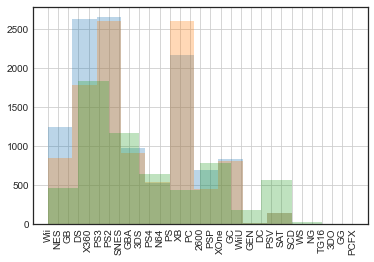

In [45]:
vgsales_NA['Platform'].hist(xrot = 90, alpha = 0.3)
vgsales_EU['Platform'].hist(xrot = 90, alpha = 0.3)
vgsales_JP['Platform'].hist(xrot = 90, alpha = 0.3)

Then, the platforms that account for more than 80% of the column's data (as per pandas profiling outcome) are retained,
 and the trend of their usage is displayed in time, for each of the three markets.

In [27]:
lst_platforms = ['DS',
'PS2',
'PS3',
'Wii',
'X360',
'PSP',
'PS',
'PC',
'XB',
'GBA']

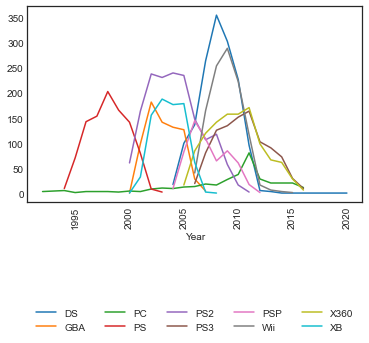

In [28]:
NA = df_transform(vgsales_NA, 'Platform', 'Year')
plot_trends(NA, 'Platform', 'Year', lst=lst_platforms)

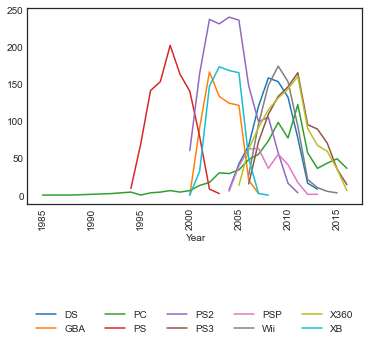

In [29]:
EU = df_transform(vgsales_EU, 'Platform', 'Year')
plot_trends(EU, 'Platform', 'Year', lst=lst_platforms)

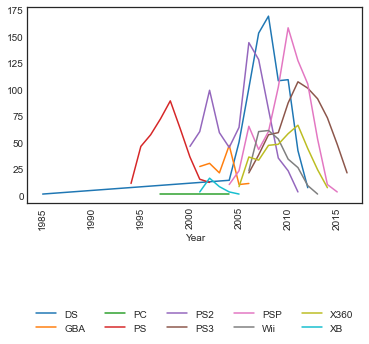

In [30]:
JP = df_transform(vgsales_JP, 'Platform', 'Year')
plot_trends(JP, 'Platform', 'Year', lst=lst_platforms)

*Publisher Analysis*

There are almost 600 Publisher categories. The most popular accounts for only 8% of the total data, meaning that there are plenty
of publishers that appear just once across the whole dataset.

The following list contains the publishers that account for 50% of the whole column: the highest frequency
is the publisher 'Electonic Arts' and the lowest in the publisher 'Take-Two Interactive', which appears 2.5% of the times.
This confirms that the other publishers, despite being over 500, have less than 3% frequency, and can be discarded at this stage.

Also,

In [ ]:
lst_publisher = ['Electronic Arts',
'Activision',
'Namco Bandai Games',
'Ubisoft',
'Konami Digital Entertainment',
'THQ',
'Nintendo',
'Sony Computer Entertainment',
'Sega',
'Take-Two Interactive']

In [ ]:
NA_publ = vgsales_NA[vgsales_NA['Publisher'].isin(lst_publisher)]
EU_publ = vgsales_EU[vgsales_EU['Publisher'].isin(lst_publisher)]
JP_publ = vgsales_JP[vgsales_JP['Publisher'].isin(lst_publisher)]

NA_publ['Publisher'].hist(xrot = 90, alpha = 0.3)
EU_publ['Publisher'].hist(xrot = 90, alpha = 0.3)
JP_publ['Publisher'].hist(xrot = 90, alpha = 0.3)

In [ ]:
NA = df_transform(vgsales_NA, 'Publisher', 'Year')
plot_trends(NA, 'Publisher', 'Year', lst = lst_publisher)

In [ ]:
EU = df_transform(vgsales_EU, 'Publisher', 'Year')
plot_trends(EU, 'Publisher', 'Year', lst = lst_publisher)

In [ ]:
JP = df_transform(vgsales_JP, 'Publisher', 'Year')
plot_trends(JP, 'Publisher', 'Year', lst = lst_publisher)




*Genre Analysis*

<AxesSubplot:>

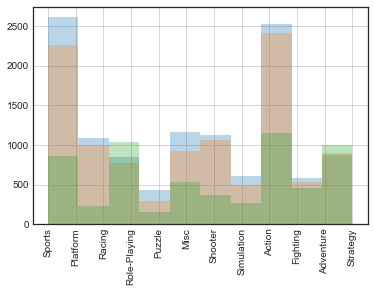

In [44]:
vgsales_NA['Genre'].hist(xrot = 90, alpha = 0.3)
vgsales_EU['Genre'].hist(xrot = 90, alpha = 0.3)
vgsales_JP['Genre'].hist(xrot = 90, alpha = 0.3)

In [49]:
lst_genre = ['Action',
'Sports',
'Misc',
'Role-Playing',
'Shooter',
'Adventure',
'Racing']

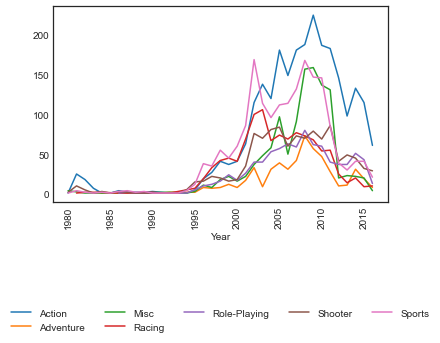

In [50]:
NA = df_transform(vgsales_NA, 'Genre', 'Year')
plot_trends(NA, 'Genre', 'Year', lst = lst_genre)

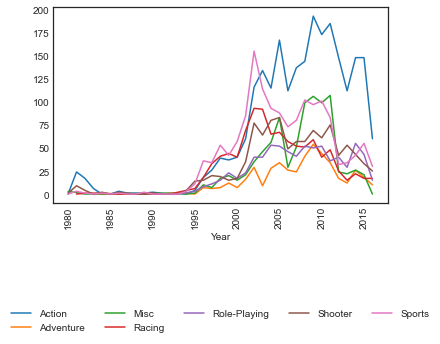

In [51]:
EU = df_transform(vgsales_EU, 'Genre', 'Year')
plot_trends(EU, 'Genre', 'Year', lst = lst_genre)

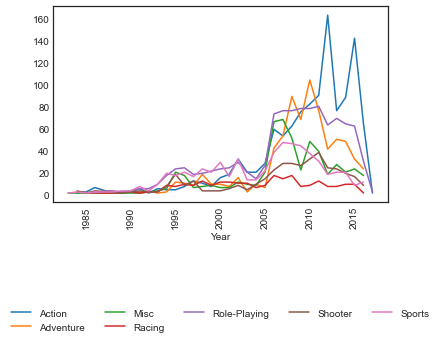

In [52]:
JP = df_transform(vgsales_JP, 'Genre', 'Year')
plot_trends(JP, 'Genre', 'Year', lst = lst_genre)



**Sales Analysis**

In [67]:
df_sales = vgsales[['Platform',  'Genre', 'Publisher','Year', 'NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales','Global_Sales']]

In [82]:
# split data into X and y
to_encode = ['Platform',  'Genre', 'Publisher']

In [87]:
df = pd.get_dummies(data=df_sales,columns=to_encode)

In [108]:
#https://github.com/dmlc/xgboost/issues/357
from  xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

X = df.drop(columns = ['Global_Sales'])
Y = df['Global_Sales']
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=0)
# fit model no training data
model = XGBRegressor()
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(model, X, Y, cv=5, scoring = 'neg_mean_absolute_error')
print("Negative MAE: %.2f" % (results.mean()))

/Users/chiara/opt/anaconda3/envs/vgsales/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


MAE: -30.70%


In [111]:
model.fit(X, Y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [112]:
sorted_idx = model.feature_importances_.argsort()
sorted_idx=sorted_idx[-15:]

Text(0.5, 0, 'Xgboost Feature Importance')

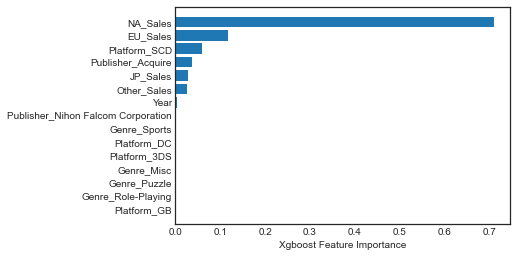

In [113]:
plt.barh(df.columns[sorted_idx], model.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")



***Appendix***

What happens when the most relevant features are removed from the model?

The MAE score doubles, suggesting that the model has lost predictive power.

In [114]:
X = df.drop(columns = ['Global_Sales','Year', 'NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales'])
Y = df['Global_Sales']
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=0)
# fit model no training data
model = XGBRegressor()
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(model, X, Y, cv=5, scoring = 'neg_mean_absolute_error')
print("Negative MAE: %.2f" % (results.mean()))

/Users/chiara/opt/anaconda3/envs/vgsales/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


MAE: -0.64


In [115]:
model.fit(X, Y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [116]:
sorted_idx = model.feature_importances_.argsort()
sorted_idx=sorted_idx[-15:]

Text(0.5, 0, 'Xgboost Feature Importance')

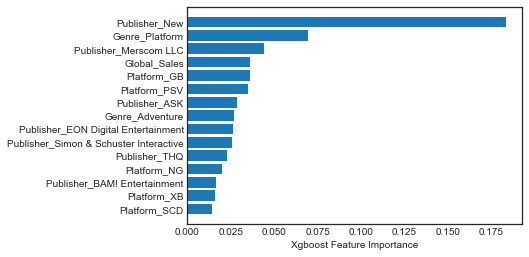

In [117]:
plt.barh(df.columns[sorted_idx], model.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")